In [1]:
library('ggplot2')
library('dplyr')
library('ggfun')
library('ggrepel')


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggfun v0.1.7 Learn more at https://yulab-smu.top/





# Figure 1C

In [2]:
volcano_plot_enhanced = function(df, logFC, FDR, Symbol, logFC_Value, FDR_value, num_symbol, labs, y_increased, title_label, output_path) {
  # Define upregulated and downregulated genes
  df = df %>% mutate(DEG = case_when(
    !!sym(logFC) > logFC_Value & !!sym(FDR) < FDR_value ~ "Up",
    abs(!!sym(logFC)) < logFC_Value | !!sym(FDR) > FDR_value ~ "None",
    !!sym(logFC) < -logFC_Value & !!sym(FDR) < FDR_value ~ "Down"
  )) %>%
    mutate(!!sym(Symbol) := rownames(.)) 

  # Count upregulated and downregulated genes
  upregulated_genes = sum(df[[logFC]] > logFC_Value & df[[FDR]] < FDR_value)
  downregulated_genes = sum(df[[logFC]] < -logFC_Value & df[[FDR]] < FDR_value)

  # Determine the range values for both axes
  y_upper = 38 # ceiling(max(-log10(df[[sym(FDR)]])))
  x_abs = 5 # max(abs(c(floor(min(df[[sym(logFC)]])), ceiling(max(df[[sym(logFC)]])))))
    
  plot = ggplot(data = df) + 
    geom_point(aes(x = !!sym(logFC), y = -log10(!!sym(FDR)), color = !!sym(logFC), size = -log10(!!sym(FDR)))) + 
    # up
    geom_text_repel(data = df %>%
                      tidyr::drop_na() %>%
                      dplyr::filter(!!sym(logFC) > logFC_Value & !!sym(FDR) < FDR_value) %>%
                      dplyr::arrange(desc(-log10(!!sym(FDR)))) %>%
                      dplyr::slice(1:num_symbol),
                    aes(x = !!sym(logFC), y = -log10(!!sym(FDR)), label = !!sym(Symbol)), 
                    nudge_x = 0.5, nudge_y = 0.2, segment.curvature = -0.1, segment.ncp = 3,
                    direction = "y", hjust = "left",
                    max.overlaps = 200) +
    # down
    geom_text_repel(data = df %>%
                      tidyr::drop_na() %>%
                      dplyr::filter(!!sym(logFC) < -logFC_Value & !!sym(FDR) < FDR_value) %>%
                      dplyr::arrange(desc(-log10(!!sym(FDR)))) %>%
                      dplyr::slice(1:num_symbol),
                    aes(x = !!sym(logFC), y = -log10(!!sym(FDR)), label = !!sym(Symbol)), 
                    box.padding = 0.5, nudge_x = -0.2, nudge_y = 0.2, segment.curvature = -0.1, segment.ncp = 3,
                    segment.angle = 20,
                    max.overlaps = 200) +
    scale_color_gradientn(colours = c("#3288bd", "#66c2a5","#ffffbf", "#f46d43", "#9e0142"), values = seq(0, 1, 0.2), limits = c(-1.5, 5)) +
    scale_fill_gradientn(colours = c("#3288bd", "#66c2a5","#ffffbf", "#f46d43", "#9e0142"), values = seq(0, 1, 0.2), limits = c(-1.5, 5)) +
    geom_vline(xintercept = c(-logFC_Value, logFC_Value), linetype = 2) +
    geom_hline(yintercept = -log10(FDR_value), linetype = 4) + 
    scale_size(range = c(1,6), limits = c(0, 40)) + 
    ggtitle(label = title_label) + 
    xlim(-x_abs, x_abs) + 
    ylim(c(-0.2, y_upper + y_increased)) + 
    labs(
     x = expression(log[2]~FC),
     y = expression(-log[10]~FDR),
     color = expression(log[2]~FC),  
     size = expression(-log[10]~FDR)          
    ) + 
    theme_bw() + 
    theme(panel.grid = element_blank(),
          legend.background = element_roundrect(color = "#808080", linetype = 1),
          axis.text = element_text(size = 13, color = "#000000"),
          axis.title = element_text(size = 15),
          plot.title = element_text(hjust = 0.5)) + 
    coord_cartesian(clip = "off") + 
    # Add text annotations for the counts
    annotation_custom(grob = grid::segmentsGrob(
      y0 = unit(-10, "pt"),
      y1 = unit(-10, "pt"),
      arrow = arrow(angle = 45, length = unit(.2, "cm"), ends = "first"),
      gp = grid::gpar(lwd = 3, col = "#3288bd")), 
      xmin = -x_abs, xmax = -1, ymin = y_upper + y_increased, ymax = y_upper + y_increased) +
    annotation_custom(
      grob = grid::textGrob(
        label = "Down",
        gp = grid::gpar(col = "#3288bd")),
      xmin = -x_abs, xmax = -1, ymin = y_upper + y_increased, ymax = y_upper + y_increased) +
    annotation_custom(
      grob = grid::segmentsGrob(
        y0 = unit(-10, "pt"),
        y1 = unit(-10, "pt"),
        arrow = arrow(angle = 45, length = unit(.2, "cm"), ends = "last"),
        gp = grid::gpar(lwd = 3, col = "#d73027")), 
      xmin = x_abs, xmax = 1, ymin = y_upper + y_increased, ymax = y_upper + y_increased) +
    annotation_custom(
      grob = grid::textGrob(
        label = "Up",
        gp = grid::gpar(col = "#d73027")),
      xmin = x_abs, xmax = 1, ymin = y_upper + y_increased, ymax = y_upper + y_increased) +
    annotation_custom(
      grob = grid::textGrob(
        label = paste(downregulated_genes, labs),
        gp = grid::gpar(col = "#3288bd")),
      xmin = -x_abs, xmax = -1, ymin = y_upper + y_increased - 2, ymax = y_upper + y_increased + 1) +
    annotation_custom(
      grob = grid::textGrob(
        label = paste(upregulated_genes, labs),
        gp = grid::gpar(col = "#d73027")),
      xmin = x_abs, xmax = 1, ymin = y_upper + y_increased - 2, ymax = y_upper + y_increased + 1) 
    
  ggsave(output_path, plot = plot, width = 6, height = 6, dpi = 300)
  return(plot)
}

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text_repel()`).”


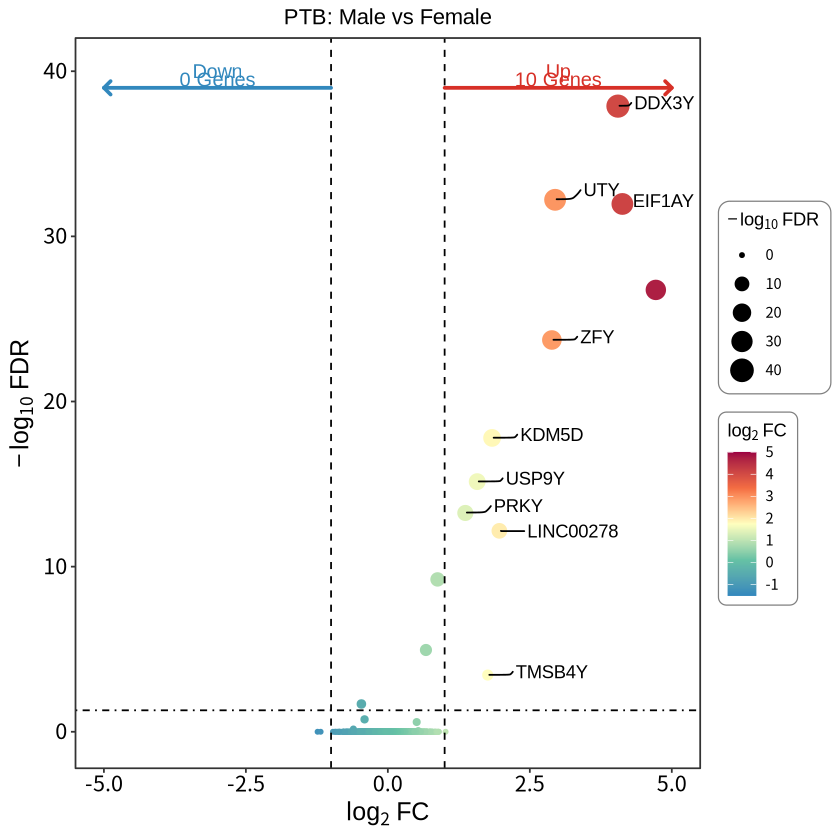

In [3]:
PTB_limma_results = read.csv("./Input/01_PTB_limma_results.csv", check.names = FALSE, row.names = 1)
df = PTB_limma_results
logFC = "logFC" 
FDR = "adj.P.Val" 
logFC_Value = 1 
FDR_value = 0.05 
num_symbol = 10 
y_increased = 2 
title_label = "PTB: Male vs Female" 
output_path = "./Output/01_PTB_limma_results_volcano.pdf" 
volcano_plot_enhanced(df, logFC, FDR, Symbol = "Symbol", logFC_Value, FDR_value, num_symbol, labs = "Genes", y_increased, title_label, output_path) 

# Figure 1D

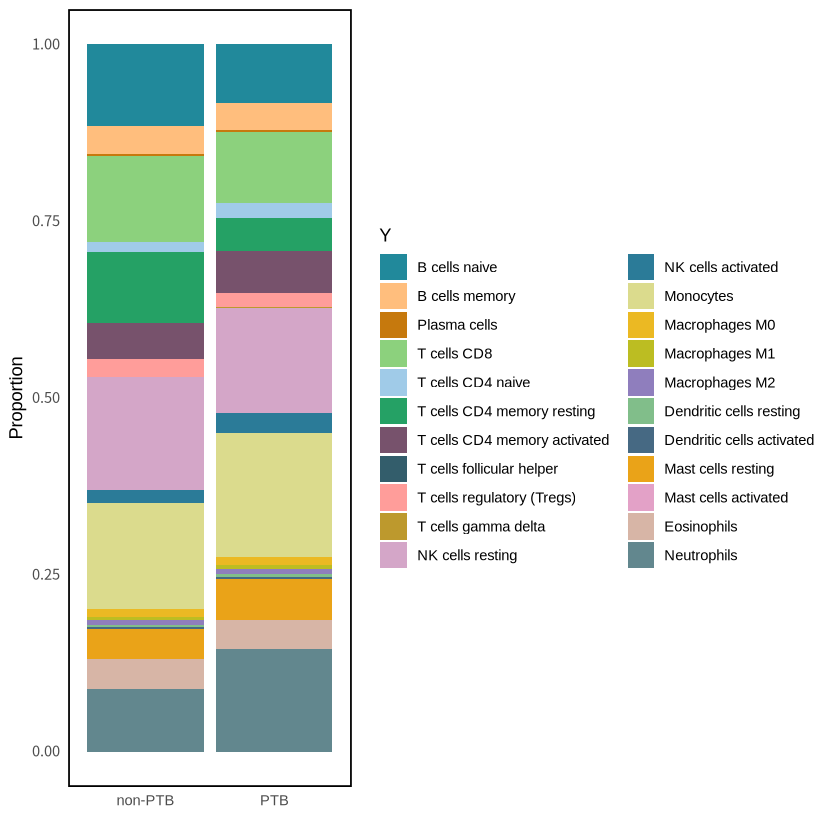

In [4]:
data = read.csv("./Input/02_cell_proportion.csv")
data$Y = factor(data$Y, levels = c("B cells naive", "B cells memory", "Plasma cells", "T cells CD8", "T cells CD4 naive", 
                                   "T cells CD4 memory resting", "T cells CD4 memory activated", "T cells follicular helper",
                                   "T cells regulatory (Tregs)", "T cells gamma delta", "NK cells resting", "NK cells activated",
                                   "Monocytes", "Macrophages M0", "Macrophages M1", "Macrophages M2", "Dendritic cells resting", 
                                   "Dendritic cells activated", "Mast cells resting", "Mast cells activated", "Eosinophils", "Neutrophils"))
p = ggplot(data, aes(x = X, y = Proportion, fill = Y)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("B cells naive" = "#21899B", "B cells memory" = "#FFBE7D", "Plasma cells" = "#C6790D", "T cells CD8" = "#8CD17D", "T cells CD4 naive" = "#a0cbe8", 
                               "T cells CD4 memory resting" = "#25A165", "T cells CD4 memory activated" = "#77526C", "T cells follicular helper" = "#335D6B",
                               "T cells regulatory (Tregs)" = "#FF9D9A", "T cells gamma delta" = "#BD992D", "NK cells resting" = "#D4A6C8", "NK cells activated" = "#2B7B98", 
                               "Monocytes" = "#DBDB8D", "Macrophages M0" = "#EBB923", "Macrophages M1" = "#BCBD22", "Macrophages M2" = "#8F7EBD", "Dendritic cells resting" = "#81BE8A", 
                               "Dendritic cells activated" = "#466983", "Mast cells resting" = "#EAA318", "Mast cells activated" = "#E3A1C7", "Eosinophils" = "#d7b5a6", "Neutrophils" = "#62878E")) +
  labs(x = "", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.border = element_rect(color = "black", fill = NA, linewidth = 1)) 
ggsave("./Output/02_average_cell_proportions.pdf", plot = p, width = 6, height = 6, dpi = 300)
p